In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5] 

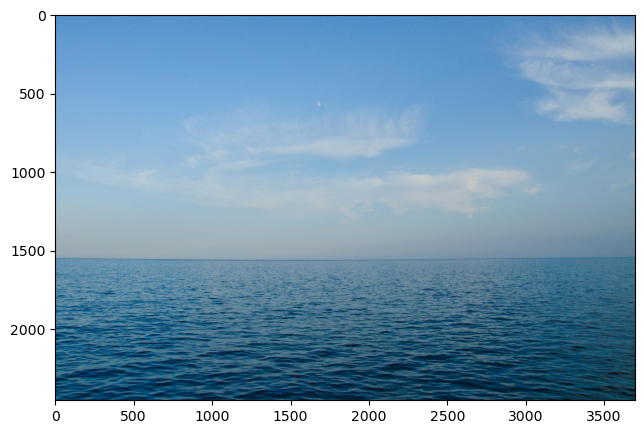

In [8]:
img = cv2.imread('Sea_02.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1eae0208bd0>)

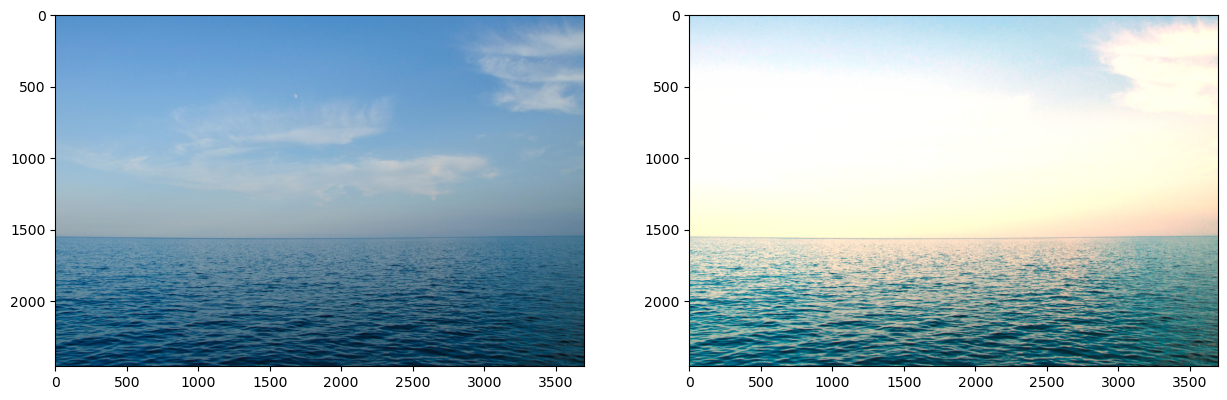

In [9]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1eab05269d0>)

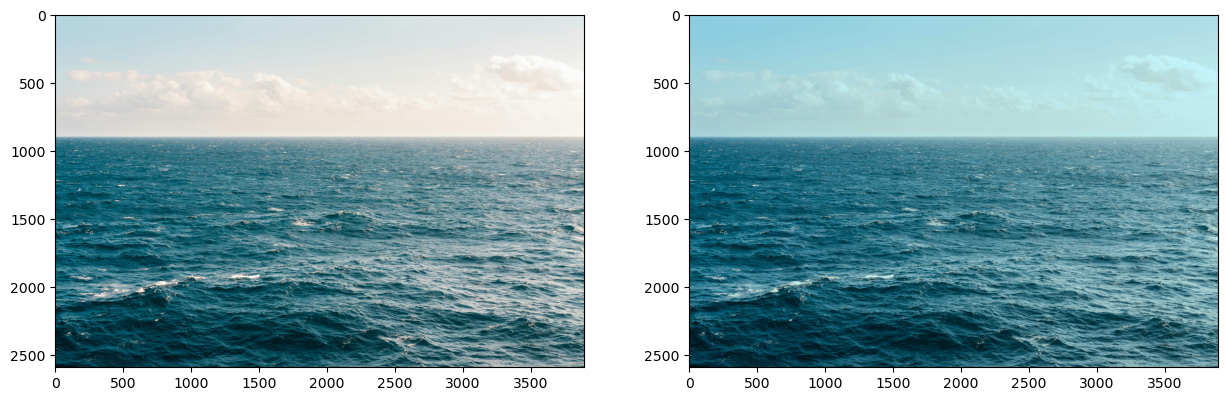

In [40]:
# Load your image
img = cv2.imread('Sea_03.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three color channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
if mean_r >= mean_g and mean_r >= mean_b:
    kr = 1.0
    kg = mean_g / mean_r
    kb = mean_r / mean_r
elif mean_g >= mean_r and mean_g >= mean_b:
    kr = mean_r / mean_g
    kg = 1.0
    kb = mean_b / mean_g
else:
    kr = mean_r / mean_b
    kg = mean_g / mean_b
    kb = 1.0

# Apply color balancing to generate the balanced image
balanced = np.zeros_like(img)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1eaa2b1a4d0>)

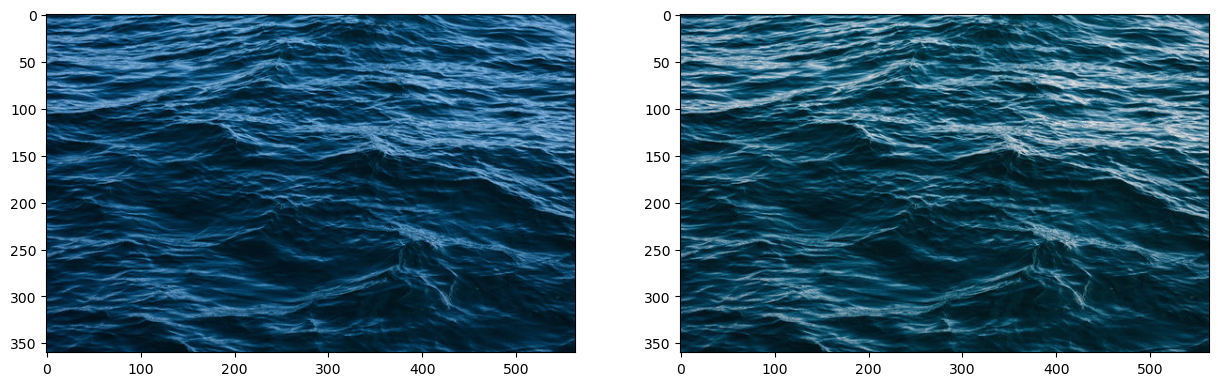

In [33]:
# Load your image
img = cv2.imread('Sea_00.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2]) 

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img)
balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255 
balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255
balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255

# Clip the values to the valid range [0, 255] and convert back to uint8 type
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)